# Monte Carlo Simulations

Another method to estimate the probability of winning is through Monte Carlo Simulations. With this method a large number of attacks are simulated whereafter the probability distribution is estimated.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable

import Modules.SimulatedAttack as SimulatedAttack

LIGHT_BLUE = np.array([0.784, 0.902, 0.937])
DARK_BLUE = np.array([0.008, 0.039, 0.098])

FILENAME = "winning_probabilites.npy"

/Users/pontushovberger/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Comparison to theoretical probabilities

The theoretical probabilities from Markov Chain of winning are saved in the file _winning_probabilities.npy_ and can be loaded to be compared to estimated probabilties from Monte Carlo simulations

In [2]:
with open(FILENAME, 'rb') as f:
    winning_probabilities = np.load(f)

winning_probabilities[:2]

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 4.167e-01, 1.061e-01, 2.700e-02, 6.900e-03, 1.800e-03,
        4.000e-04, 1.000e-04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00]])

### 1 attacker, 1 defender

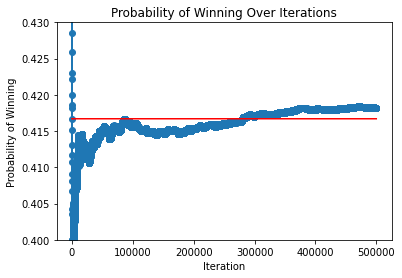

Estimated probability of winning 41.82%
Theoretical probability 41.67%


In [3]:
nsim = 500000
win = 0
probabilities = []

for n in range(0, nsim):
    if(SimulatedAttack.simulated_attack(1, 1)[1] == 0):
        win += 1
    
    if n != 0:
        probability = win / (n + 1)
        probabilities.append(probability)

# Plot the estimated probability
plt.plot(range(1, nsim), probabilities, marker='o', label='Estimated Probability (Monte Carlo)')
plt.plot(range(1, nsim), [winning_probabilities[1][1]] * (nsim - 1), 'r-', label='Theoretical Probability (Markov Chain)')
plt.xlabel('Iteration')
plt.ylabel('Probability of Winning')
plt.title('Probability of Winning Over Iterations')
plt.ylim(0.40, 0.43)
plt.show()
    
print("Estimated probability of winning {:.2%}".format(win/nsim))
print("Theoretical probability {:.2%}".format(winning_probabilities[1][1]))

### 2 attackers, 1 defender

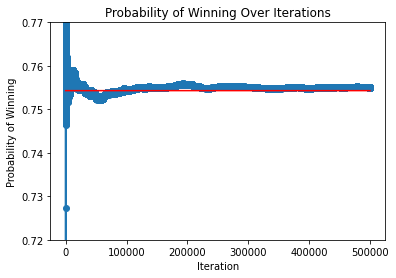

Estimated probability of winning 75.50%
Theoretical probability 75.43%


In [4]:
nsim = 500000
win = 0
probabilities = []

for n in range(0, nsim):
    if(SimulatedAttack.simulated_attack(2, 1)[1] == 0):
        win += 1
    
    if n != 0:
        probability = win / (n + 1)
        probabilities.append(probability)

# Plot the estimated probability
plt.plot(range(1, nsim), probabilities, marker='o', label='Estimated Probability (Monte Carlo)')
plt.plot(range(1, nsim), [winning_probabilities[2][1]] * (nsim - 1), 'r-', label='Theoretical Probability (Markov Chain)')
plt.xlabel('Iteration')
plt.ylabel('Probability of Winning')
plt.title('Probability of Winning Over Iterations')
plt.ylim(0.72, 0.77)
plt.show()

print("Estimated probability of winning {:.2%}".format(win/nsim))
print("Theoretical probability {:.2%}".format(winning_probabilities[2][1]))

## Simulations for more troops

### Heatmap for $\le 10$ defenders and $\le 10$ attackers

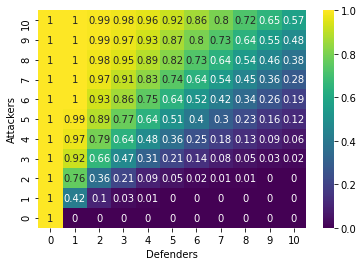

In [5]:
nsim = 20000
maximum_no_troops = 10
estimated_probabilities = np.zeros((maximum_no_troops+1, maximum_no_troops+1))

for a in range(maximum_no_troops+1):
    for d in range(maximum_no_troops+1):
        win = 0
        for n in range(0, nsim):
            if(SimulatedAttack.simulated_attack(a, d)[1] == 0):
                win += 1

        probability = win / nsim
        estimated_probabilities[a][d] = round(probability,2)

sns.heatmap(data=estimated_probabilities, annot=True, cmap='viridis')
plt.xlabel("Defenders")
plt.ylabel("Attackers")
plt.ylim(reversed(plt.ylim()))
plt.show()

### Probability distribution for $20$ attackers and $10$ defenders

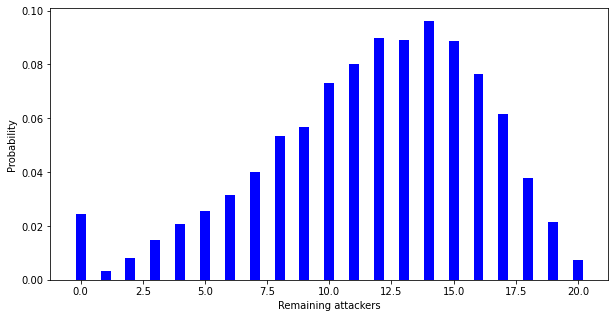

In [6]:
nsim = 20000
no_defenders = 10
no_attackers = 20

fig = plt.figure(figsize = (10, 5))

remaining_attackers = np.zeros(no_attackers+1)

# Monte Carlo simulation
for n in range(0, nsim):
    remaining_attackers[SimulatedAttack.simulated_attack(no_attackers, no_defenders)[0]] += 1

plt.bar(range(no_attackers+1), remaining_attackers/nsim, color='blue', width = 0.4)
plt.xlabel("Remaining attackers")
plt.ylabel("Probability")
plt.show()

### Probability distribution for $\le 30$ attackers and $10$ defenders

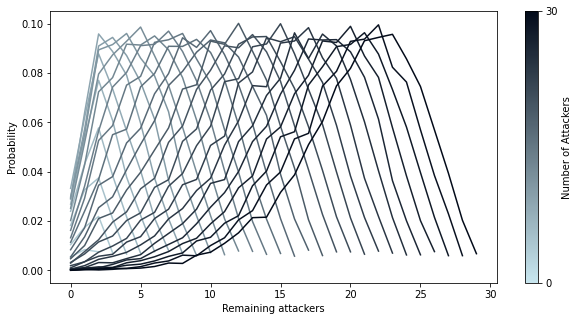

In [7]:
nsim = 20000
no_defenders = 10
max_attackers = 30

colors = [LIGHT_BLUE + (DARK_BLUE - LIGHT_BLUE) * i / (max_attackers) for i in range(max_attackers+1)]
cmap = LinearSegmentedColormap.from_list("custom_blue", colors)
fig, ax = plt.figure(figsize=(10, 5)), plt.gca() 

for no_attackers in range(max_attackers+1):
    remaining_attackers = np.zeros(no_attackers+1)

    # Monte Carlo simulation
    for n in range(0, nsim):
        remaining_attackers[SimulatedAttack.simulated_attack(no_attackers, no_defenders)[0]] += 1
    
    plt.plot(remaining_attackers[1:]/nsim, color=colors[no_attackers])


norm = Normalize(vmin=0, vmax=max_attackers)
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, ticks=[0, max_attackers])
cbar.set_label('Number of Attackers')
cbar.ax.set_yticklabels([0, str(max_attackers)])

ax.set_xlabel("Remaining attackers")
ax.set_ylabel("Probability")
plt.show()